# The Perceptron

The perceptron is a linear classifier. The basic purpose of the algorithn is to find a hyperplane (assumming it exists) that seperates the data based on classification.

Load in the data

In [1]:
import numpy as np
from numpy.matlib import repmat
import sys
import matplotlib 
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

# add p02 folder
sys.path.insert(0, './p02/')

%matplotlib inline

In [2]:
def loaddata(filename):
    """
    Returns xTr,yTr,xTe,yTe
    xTr, xTe are in the form nxd
    yTr, yTe are in the form nx1
    """
    data = loadmat(filename)
    xTr = data["xTr"]; # load in Training data
    yTr = np.round(data["yTr"]); # load in Training labels
    xTe = data["xTe"]; # load in Testing data
    yTe = np.round(data["yTe"]); # load in Testing labels
    return xTr.T,yTr.T,xTe.T,yTe.T

In [3]:
def row_vectorize(x):
    return x.reshape(1,-1)

Update the vector $w$ given by the function: $$w \leftarrow w + y*x$$

In [6]:
def perceptronUpdate(x,y,w):
    """
    function w=perceptronUpdate(x,y,w);
    
    Implementation of Perceptron weights updating
    Input:
        x : input vector of d dimensions (1xd)
        y : corresponding label (-1 or +1)
        w : weight vector before updating
    
    Output:
        w : weight vector after updating
    """
    # just in case x, w are accidentally transposed (prevents future bugs)
    x,w = map(row_vectorize, [x,w])
    assert(y in {-1,1})
    
    # update w vector by adding in misclassified x
    w = w + y*x
    return w

Define the perceptron given the following algorithm:
1. Start with $\vec w = 0$
2. Iterate through the observations (randomly sorted)
    a. If $y_i \cdot w \cdot x_i^T \le 0$:
        Update $w$ given $w \leftarrow w + y*x$
        
If no changes are made to $w$ (meaning all points are correctly classified), or the number of iterations is over a certain threshold, then stop the algorithm.
        
       

In [8]:
def perceptron(x,y):
    """
    function w=perceptron(x,y);
    
    Implementation of a Perceptron classifier
    Input:
        x : n input vectors of d dimensions (nxd)
        y : n labels (-1 or +1)
    
    Output:
        w : weight vector (1xd)
    """
    
    n, d = x.shape
    w = np.zeros((1,d))
    
    # Iterate over each x
    niter = 0
    while True:
        m = 0
        niter += 1
        #iterate through randomly sorted indexes
        indexes = np.random.permutation(range(n))
        for i in indexes:
            # check if obs on correct side of hyperplane
            if y[i]*w.dot(x[i].T) <= 0:
                w = perceptronUpdate(x[i],y[i],w)
                m += 1
        if m == 0 or niter >= 100:
            break
    return w

Given a trained vector $\vec w$, output predictions given test observations.

In [19]:
def classifyLinear(x,w,b=0):
    """
    function preds=classifyLinear(x,w,b)
    
    Make predictions with a linear classifier
    Input:
        x : n input vectors of d dimensions (dxn)
        w : weight vector (dx1)
        b : bias (scalar)
    
    Output:
        preds: predictions (1xn)
    """
    w = w.reshape(-1)
    ## fill in code here
    preds = np.zeros((x.shape[0], 1))
    for i in range(preds):
        if np.matmul(w, x[i]) + b > 0:
            preds[j] = 1
        else:
            preds[j] = -1
    return preds.reshape(1, x.shape[0])

Graph an example

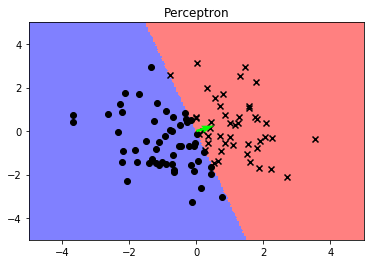

In [26]:
# number of input vectors
N = 100
# Define the symbols and colors we'll use in the plots later
symbols = ['ko', 'kx']
mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
classvals = [-1, 1]

# generate random (linarly separable) data
trainPoints = np.random.randn(N, 2) * 1.5

# defining random hyperplane
w = np.random.rand(2)

# assigning labels +1, -1 labels depending on what side of the plane they lie on
trainLabels = np.sign(np.dot(trainPoints, w))
i = np.random.permutation([i for i in range(N)])

# shuffling training points in random order
trainPoints = trainPoints[i, :]
trainLabels = trainLabels[i]

# call perceptron to find w from data
w = perceptron(trainPoints,trainLabels)
b = 0

res=300
xrange = np.linspace(-5, 5,res)
yrange = np.linspace(-5, 5,res)
pixelX = repmat(xrange, res, 1)
pixelY = repmat(yrange, res, 1).T

testPoints = np.array([pixelX.flatten(), pixelY.flatten(), np.ones(pixelX.flatten().shape)]).T
testLabels = np.dot(testPoints, np.concatenate([w.flatten(), [b]]))

Z = testLabels.reshape(res,res)
plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
plt.scatter(trainPoints[trainLabels == classvals[0],0],
            trainPoints[trainLabels == classvals[0],1],
            marker='o',
            color='k'
           )
plt.scatter(trainPoints[trainLabels == classvals[1],0],
            trainPoints[trainLabels == classvals[1],1],
            marker='x',
            color='k'
           )
plt.quiver(0,0,w[0,0],w[0,1],linewidth=0.5, color=[0,1,0])
plt.axis('tight')
plt.title('Perceptron')
plt.savefig('perceptron.png', facecolor='#BCBCBCFF')
plt.show()